## Setup & Data

In [1]:
# Import pytorch
import torch
from torch import nn

# Import torch vision
import torchvision
from torchvision import transforms, datasets

# Import matplotlib for visualisation
import matplotlib.pyplot as plt

In [2]:
# Define augmentation and normalisation for training
resnet_train_transform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(224, padding=4),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

cnn_train_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(32, padding=4),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

# Normalise and transform test data
resnet_test_transform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

cnn_test_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

# Setup training data
cnn_train_data = datasets.CIFAR10(
    root="sample_data",
    train=True,
    download=True,
    transform=cnn_train_transform,
    target_transform=None
)

resnet_train_data = datasets.CIFAR10(
    root="sample_data",
    train=True,
    download=True,
    transform=resnet_train_transform,
    target_transform=None
)

# Setup testing data
cnn_test_data = datasets.CIFAR10(
    root="sample_data",
    train=False,
    download=True,
    transform=cnn_test_transform
)

resnet_test_data = datasets.CIFAR10(
    root="sample_data",
    train=False,
    download=True,
    transform=resnet_test_transform
)

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


In [3]:
# Dislpay the first image and its corresponding lable from the training dataset
img, label = cnn_train_data[0]
img, label

(tensor([[[-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          [-2.1179,  0.4851,  0.5878,  ..., -2.1179, -2.1179, -2.1179],
          ...,
          [ 1.4098,  1.3584,  0.3309,  ...,  0.8276, -2.1179, -2.1179],
          [ 0.8447,  1.0673, -0.1657,  ...,  1.3413, -2.1179, -2.1179],
          [-2.1179, -2.1179, -2.1179,  ...,  1.5810, -2.1179, -2.1179]],
 
         [[-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          [-2.0357,  0.1527,  0.2752,  ..., -2.0357, -2.0357, -2.0357],
          ...,
          [ 0.9930,  0.8880, -0.1625,  ...,  0.2052, -2.0357, -2.0357],
          [ 0.4853,  0.6779, -0.5126,  ...,  0.7129, -2.0357, -2.0357],
          [-2.0357, -2.0357, -2.0357,  ...,  1.0105, -2.0357, -2.0357]],
 
         [[-1.8044, -1.8044, -1.8044,  ..., -1.8044, -1.8044, -1.8044],
          [-1.8044, -1.8044,

# About the data

- Input and output shapes
- Lables
- Sample images

In [4]:
# Per-sample input shape
print(f"Per-sample input shape: {img.shape}") # [3, 32, 32] -> 3 colour channels, 32 x 32

# Output shape
print("Output shape: {label}") # scalar integer

Per-sample input shape: torch.Size([3, 32, 32])
Output shape: {label}


In [5]:
# Number of samples
len(cnn_train_data.data), len(cnn_train_data.targets), len(cnn_test_data.data), len(cnn_test_data.targets)

(50000, 50000, 10000, 10000)

In [6]:
# Class names
class_names = cnn_train_data.classes
class_names

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..1.8158263].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.2739873].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.465708].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..1.7808123].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.1804092].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..1.1357993].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.025

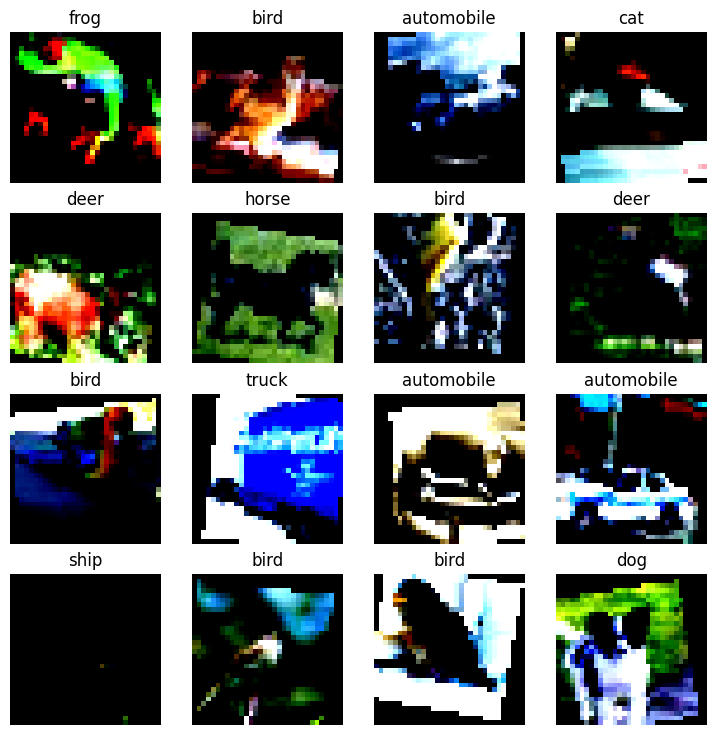

In [7]:
# Plot some more images
torch.manual_seed(42)

fig = plt.figure(figsize=(9,9))
rows, cols = 4, 4
for i in range(1, rows * cols + 1):
    random_idx = torch.randint(0, len(cnn_train_data), size=[1]).item() # get a random sample from train_data
    image, label = cnn_train_data[random_idx]

    # Disaply each sample
    fig.add_subplot(rows, cols, i)
    plt.imshow(image.permute(1, 2, 0))
    plt.title(class_names[label])
    plt.axis(False)


# Prepare dataloader

- Create batches of samples from train_data and test_data


In [8]:
from torch.utils.data import DataLoader

CNN_BATCH_SIZE = 32
RESNET_BATCH_SIZE = 16

# Turn datasets into batches
cnn_train_dataloader = DataLoader(
    dataset=cnn_train_data, # dataset to turn into batches
    batch_size=CNN_BATCH_SIZE, # number of samples per batch
    shuffle=True # shuffle data per epoch -> improved generalisation
)

cnn_test_dataloader = DataLoader(
    dataset=cnn_test_data,
    batch_size=CNN_BATCH_SIZE,
    shuffle=False
)

resnet_train_dataloader = DataLoader(
    dataset=resnet_train_data, # dataset to turn into batches
    batch_size=RESNET_BATCH_SIZE, # number of samples per batch
    shuffle=True # shuffle data per epoch -> improved generalisation
)

resnet_test_dataloader = DataLoader(
    dataset=resnet_test_data,
    batch_size=RESNET_BATCH_SIZE,
    shuffle=False
)

# Display batch sizes
print(f"Train dataloader: {len(cnn_train_dataloader)} batches of {CNN_BATCH_SIZE}")
print(f"Test dataloader: {len(cnn_test_dataloader)} batches of {CNN_BATCH_SIZE}")
print(f"Train dataloader: {len(resnet_train_dataloader)} batches of {RESNET_BATCH_SIZE}")
print(f"Test dataloader: {len(resnet_test_dataloader)} batches of {RESNET_BATCH_SIZE}")


Train dataloader: 1563 batches of 32
Test dataloader: 313 batches of 32
Train dataloader: 3125 batches of 16
Test dataloader: 625 batches of 16


# Model 0: Simple CNN

In [9]:
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [10]:
import torch.nn.functional as F

class SimpleCNN(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()

        self.group1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2)
        )

        self.group2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2)
        )

        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units * 8 * 8,
                      out_features=hidden_units*4),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units*4,
                      out_features=output_shape)
        )

    def forward(self, x: torch.Tensor):
        x = self.group1(x)
        x = self.group2(x)
        x = self.classifier(x)
        return x

torch.manual_seed(42)
model_0 = SimpleCNN(input_shape=3,  # Images have 3 color channels
                    hidden_units=32,
                    output_shape=len(class_names)).to(device)
model_0

SimpleCNN(
  (group1): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (group2): Sequential(
    (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2048, out_features=128, bias=True)
    (2): ReLU()
    (3): Linear(in_features=128, out_features=10, bias=True)
  )
)

# Model 1: Complex CNN


In [11]:
class ComplexCNN(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()

        # Convolutional layers with batch normalisation and max pooling
        self.group_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3,
                      padding=1),
            nn.BatchNorm2d(num_features=hidden_units), # normalise activations of a layer at each batch -> improved training speed and stability
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2)
            )

        self.group_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      padding=1),
            nn.BatchNorm2d(num_features=hidden_units),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2)
        )

        self.group_3 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      padding=1),
            nn.BatchNorm2d(num_features=hidden_units),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2)
        )

        # Fully connected layers (Classifier)
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(hidden_units* 4 * 4, # after 3 max pooling layers -> 224/2/2/2 = 28
                      hidden_units*4),
            nn.ReLU(),
            nn.Dropout(p=0.5), # randomly zeroes some of the elements of the input tensor with probability p using samples from a Bernoulli distribution -> prevent overfitting
            nn.Linear(hidden_units*4,
                      output_shape)
            )
    
    def forward(self, x: torch.Tensor):
        x = self.group_1(x)
        x = self.group_2(x)
        x = self.group_3(x)
        x = self.classifier(x)
        return x


torch.manual_seed(42)
model_1 = ComplexCNN(input_shape=3,
                    hidden_units=32,
                    output_shape=len(class_names)).to(device)
model_1


ComplexCNN(
  (group_1): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (group_2): Sequential(
    (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (group_3): Sequential(
    (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=512, out_fea

# Model 2: Pretrained / Loaded CNN

In [44]:
from torchvision import models as tv_models

model_2 = tv_models.resnet18(pretrained=True) # download pretrained weights
model_2.fc = nn.Linear(model_2.fc.in_features,len(class_names)) # change output layer to match number of classes
model_2 = model_2.to(device)

model_2

C:\Users\tobyv\AppData\Roaming\Python\Python39\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\tobyv\AppData\Roaming\Python\Python39\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

# Train the models

### Setup evaluation metric

In [13]:
import torchmetrics
from torchmetrics import Accuracy

# Initialise accuracy metrics
train_metric = Accuracy(task="multiclass", num_classes=len(class_names)).to(device)
test_metric = Accuracy(task="multiclass", num_classes=len(class_names)).to(device)


### Functionise train and test loops

In [14]:
def train_loop(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: nn.Module,
               optimizer: torch.optim.Optimizer,
               metric: torchmetrics.Accuracy,
               device: torch.device = device):

    train_loss = 0
    model.to(device) # Send the model to the device
    metric.reset()
    for batch, (X, y) in enumerate(data_loader):
        # Send dat to the device
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate loss and update accuracy metric
        loss = loss_fn(y_pred, y)
        train_loss += loss

        metric.update(y_pred, y)

        # 3. Optimiser zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimiser step
        optimizer.step()

    # Calculate loss and accuracy per epoch
    train_loss = (train_loss / len(data_loader)).item()
    train_acc = metric.compute().item() * 100 # to percentage
    metric.reset() # reset for next epoch
    print(f"Train loss: {train_loss:.5f} | Train acc: {train_acc:.2f}%")

    return train_loss, train_acc


def test_loop(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: nn.Module,
              metric: torchmetrics.Accuracy,
              device: torch.device = device):
    test_loss = 0
    model.to(device) # Send the model to the device
    # Turn on evaluation
    model.eval()
    metric.reset()

    # Turn on inference context manager
    with torch.inference_mode():
        for X, y in data_loader:
            # Send dat to the device
            X, y = X.to(device), y.to(device)

            # 1. Forward pass
            test_pred = model(X)

            # 2. Calculate loss and update accuracy metric
            loss = loss_fn(test_pred, y)
            test_loss += loss.item()

            metric.update(test_pred, y)

        # Adjust metrics and print out
        test_loss = (test_loss / len(data_loader))
        test_acc = metric.compute().item() * 100 # to percentage
        metric.reset()
        print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%\n")

    return test_loss, test_acc

### Setup loss function and optimizer for model 0

### Train Model 0

In [15]:
# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(), lr=1e-4)

In [16]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

model_0_train_results = {"loss": [], "accuracy": []}
model_0_test_results = {"loss": [], "accuracy": []}

torch.manual_seed(42) # for reproducibility

num_epochs = 10
for epoch in tqdm(range(num_epochs)):
    print(f"Epoch: {epoch+1}\n-------")
    train_loss, train_acc = train_loop(model=model_0,
                                       data_loader=cnn_train_dataloader,
                                       loss_fn=loss_fn,
                                       optimizer=optimizer,
                                       metric=train_metric)

    test_loss, test_acc = test_loop(model=model_0,
                                    data_loader=cnn_test_dataloader,
                                    loss_fn=loss_fn,
                                    metric=test_metric)

    model_0_train_results["loss"].append(train_loss)
    model_0_train_results["accuracy"].append(train_acc)
    model_0_test_results["loss"].append(test_loss)
    model_0_test_results["accuracy"].append(test_acc)




c:\Python39\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1
-------
Train loss: 1.78474 | Train acc: 35.56%


 10%|█         | 1/10 [00:29<04:22, 29.17s/it]

Test loss: 1.58109 | Test accuracy: 42.76%

Epoch: 2
-------
Train loss: 1.53600 | Train acc: 44.36%


 20%|██        | 2/10 [00:57<03:47, 28.40s/it]

Test loss: 1.49686 | Test accuracy: 46.66%

Epoch: 3
-------
Train loss: 1.44227 | Train acc: 48.01%


 30%|███       | 3/10 [01:25<03:17, 28.23s/it]

Test loss: 1.33056 | Test accuracy: 52.72%

Epoch: 4
-------
Train loss: 1.38340 | Train acc: 50.31%


 40%|████      | 4/10 [01:55<02:55, 29.29s/it]

Test loss: 1.25798 | Test accuracy: 55.28%

Epoch: 5
-------
Train loss: 1.33076 | Train acc: 52.46%


 50%|█████     | 5/10 [02:27<02:30, 30.11s/it]

Test loss: 1.25573 | Test accuracy: 55.57%

Epoch: 6
-------
Train loss: 1.29416 | Train acc: 54.09%


 60%|██████    | 6/10 [02:59<02:02, 30.71s/it]

Test loss: 1.20682 | Test accuracy: 57.16%

Epoch: 7
-------
Train loss: 1.25171 | Train acc: 55.44%


 70%|███████   | 7/10 [03:30<01:32, 30.95s/it]

Test loss: 1.16634 | Test accuracy: 58.66%

Epoch: 8
-------
Train loss: 1.22003 | Train acc: 56.59%


 80%|████████  | 8/10 [04:02<01:02, 31.15s/it]

Test loss: 1.10300 | Test accuracy: 61.64%

Epoch: 9
-------
Train loss: 1.18950 | Train acc: 57.91%


 90%|█████████ | 9/10 [04:34<00:31, 31.36s/it]

Test loss: 1.08771 | Test accuracy: 62.21%

Epoch: 10
-------
Train loss: 1.16835 | Train acc: 58.55%


100%|██████████| 10/10 [05:05<00:00, 30.59s/it]

Test loss: 1.06990 | Test accuracy: 62.30%



In [17]:
# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_1.parameters(), lr=1e-3)

### Train Model 1

In [18]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

model_1_train_results = {"loss": [], "accuracy": []}
model_1_test_results = {"loss": [], "accuracy": []}

torch.manual_seed(42) # for reproducibility

num_epochs = 10
for epoch in tqdm(range(num_epochs)):
    print(f"Epoch: {epoch+1}\n-------")
    train_loss, train_acc = train_loop(model=model_1,
               data_loader=cnn_train_dataloader,
               loss_fn=loss_fn,
               optimizer=optimizer,
               metric=train_metric)
               
    test_loss, test_acc = test_loop(model=model_1,
              data_loader=cnn_test_dataloader,
              loss_fn=loss_fn,
              metric=test_metric)

    model_1_train_results["loss"].append(train_loss)
    model_1_train_results["accuracy"].append(train_acc)
    model_1_test_results["loss"].append(test_loss)
    model_1_test_results["accuracy"].append(test_acc)

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1
-------
Train loss: 1.63544 | Train acc: 39.14%


 10%|█         | 1/10 [00:34<05:09, 34.34s/it]

Test loss: 1.25336 | Test accuracy: 53.39%

Epoch: 2
-------
Train loss: 1.24282 | Train acc: 54.91%


 20%|██        | 2/10 [01:08<04:33, 34.17s/it]

Test loss: 1.00777 | Test accuracy: 64.12%

Epoch: 3
-------
Train loss: 1.08310 | Train acc: 60.79%


 30%|███       | 3/10 [01:41<03:56, 33.83s/it]

Test loss: 0.91662 | Test accuracy: 67.43%

Epoch: 4
-------
Train loss: 1.00001 | Train acc: 64.31%


 40%|████      | 4/10 [02:15<03:22, 33.81s/it]

Test loss: 0.86460 | Test accuracy: 69.70%

Epoch: 5
-------
Train loss: 0.95141 | Train acc: 66.17%


 50%|█████     | 5/10 [02:49<02:49, 33.85s/it]

Test loss: 0.81631 | Test accuracy: 71.31%

Epoch: 6
-------
Train loss: 0.90997 | Train acc: 68.00%


 60%|██████    | 6/10 [03:23<02:16, 34.02s/it]

Test loss: 0.81233 | Test accuracy: 71.52%

Epoch: 7
-------
Train loss: 0.88461 | Train acc: 68.76%


 70%|███████   | 7/10 [03:57<01:41, 33.94s/it]

Test loss: 0.80475 | Test accuracy: 71.68%

Epoch: 8
-------
Train loss: 0.85355 | Train acc: 69.75%


 80%|████████  | 8/10 [04:29<01:06, 33.34s/it]

Test loss: 0.77599 | Test accuracy: 72.95%

Epoch: 9
-------
Train loss: 0.83865 | Train acc: 70.52%


 90%|█████████ | 9/10 [05:01<00:32, 32.96s/it]

Test loss: 0.75954 | Test accuracy: 74.01%

Epoch: 10
-------
Train loss: 0.82259 | Train acc: 70.87%


100%|██████████| 10/10 [05:35<00:00, 33.56s/it]

Test loss: 0.72339 | Test accuracy: 75.33%



### Train Model 2

In [19]:
# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_2.parameters(), lr=1e-4) 

In [20]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

model_2_train_results = {"loss": [], "accuracy": []}
model_2_test_results = {"loss": [], "accuracy": []}

torch.manual_seed(42) # for reproducibility

num_epochs = 10
for epoch in tqdm(range(num_epochs)):
    print(f"Epoch: {epoch+1}\n-------")
    train_loss, train_acc = train_loop(model=model_2,
               data_loader=resnet_train_dataloader,
               loss_fn=loss_fn,
               optimizer=optimizer,
               metric=train_metric)

    test_loss, test_acc = test_loop(model=model_2,
              data_loader=resnet_test_dataloader,
              loss_fn=loss_fn,
              metric=test_metric)

    model_2_train_results["loss"].append(train_loss)
    model_2_train_results["accuracy"].append(train_acc)
    model_2_test_results["loss"].append(test_loss)
    model_2_test_results["accuracy"].append(test_acc)

    print(model_2_train_results)

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1
-------
Train loss: 0.40625 | Train acc: 86.36%


 10%|█         | 1/10 [04:11<37:47, 251.94s/it]

Test loss: 0.20729 | Test accuracy: 93.12%

{'loss': [0.4062502384185791], 'accuracy': [86.36400103569031]}
Epoch: 2
-------
Train loss: 0.29256 | Train acc: 90.12%


 20%|██        | 2/10 [11:11<46:45, 350.73s/it]

Test loss: 0.27003 | Test accuracy: 90.90%

{'loss': [0.4062502384185791, 0.29255834221839905], 'accuracy': [86.36400103569031, 90.11800289154053]}
Epoch: 3
-------
Train loss: 0.21043 | Train acc: 92.61%


 30%|███       | 3/10 [18:30<45:36, 390.98s/it]

Test loss: 0.25673 | Test accuracy: 91.22%

{'loss': [0.4062502384185791, 0.29255834221839905, 0.2104317843914032], 'accuracy': [86.36400103569031, 90.11800289154053, 92.61199831962585]}
Epoch: 4
-------
Train loss: 0.17480 | Train acc: 94.04%


 40%|████      | 4/10 [22:41<33:33, 335.63s/it]

Test loss: 0.20560 | Test accuracy: 93.08%

{'loss': [0.4062502384185791, 0.29255834221839905, 0.2104317843914032, 0.17479708790779114], 'accuracy': [86.36400103569031, 90.11800289154053, 92.61199831962585, 94.03600096702576]}
Epoch: 5
-------
Train loss: 0.14651 | Train acc: 94.93%


 50%|█████     | 5/10 [25:42<23:20, 280.05s/it]

Test loss: 0.25754 | Test accuracy: 91.92%

{'loss': [0.4062502384185791, 0.29255834221839905, 0.2104317843914032, 0.17479708790779114, 0.14651045203208923], 'accuracy': [86.36400103569031, 90.11800289154053, 92.61199831962585, 94.03600096702576, 94.92599964141846]}
Epoch: 6
-------
Train loss: 0.12550 | Train acc: 95.66%


 60%|██████    | 6/10 [28:41<16:22, 245.66s/it]

Test loss: 0.22617 | Test accuracy: 92.77%

{'loss': [0.4062502384185791, 0.29255834221839905, 0.2104317843914032, 0.17479708790779114, 0.14651045203208923, 0.12549808621406555], 'accuracy': [86.36400103569031, 90.11800289154053, 92.61199831962585, 94.03600096702576, 94.92599964141846, 95.65600156784058]}
Epoch: 7
-------
Train loss: 0.10876 | Train acc: 96.28%


 70%|███████   | 7/10 [31:41<11:12, 224.04s/it]

Test loss: 0.19693 | Test accuracy: 94.09%

{'loss': [0.4062502384185791, 0.29255834221839905, 0.2104317843914032, 0.17479708790779114, 0.14651045203208923, 0.12549808621406555, 0.10876188427209854], 'accuracy': [86.36400103569031, 90.11800289154053, 92.61199831962585, 94.03600096702576, 94.92599964141846, 95.65600156784058, 96.27599716186523]}
Epoch: 8
-------
Train loss: 0.09631 | Train acc: 96.70%


 80%|████████  | 8/10 [34:40<06:59, 209.74s/it]

Test loss: 0.21869 | Test accuracy: 93.12%

{'loss': [0.4062502384185791, 0.29255834221839905, 0.2104317843914032, 0.17479708790779114, 0.14651045203208923, 0.12549808621406555, 0.10876188427209854, 0.09630750864744186], 'accuracy': [86.36400103569031, 90.11800289154053, 92.61199831962585, 94.03600096702576, 94.92599964141846, 95.65600156784058, 96.27599716186523, 96.70000076293945]}
Epoch: 9
-------
Train loss: 0.08999 | Train acc: 96.99%


 90%|█████████ | 9/10 [37:39<03:20, 200.10s/it]

Test loss: 0.22510 | Test accuracy: 93.52%

{'loss': [0.4062502384185791, 0.29255834221839905, 0.2104317843914032, 0.17479708790779114, 0.14651045203208923, 0.12549808621406555, 0.10876188427209854, 0.09630750864744186, 0.08998704701662064], 'accuracy': [86.36400103569031, 90.11800289154053, 92.61199831962585, 94.03600096702576, 94.92599964141846, 95.65600156784058, 96.27599716186523, 96.70000076293945, 96.98600172996521]}
Epoch: 10
-------
Train loss: 0.08326 | Train acc: 97.15%


100%|██████████| 10/10 [40:38<00:00, 243.89s/it]

Test loss: 0.21408 | Test accuracy: 93.93%

{'loss': [0.4062502384185791, 0.29255834221839905, 0.2104317843914032, 0.17479708790779114, 0.14651045203208923, 0.12549808621406555, 0.10876188427209854, 0.09630750864744186, 0.08998704701662064, 0.08326075971126556], 'accuracy': [86.36400103569031, 90.11800289154053, 92.61199831962585, 94.03600096702576, 94.92599964141846, 95.65600156784058, 96.27599716186523, 96.70000076293945, 96.98600172996521, 97.14599847793579]}


# Compare results of each model

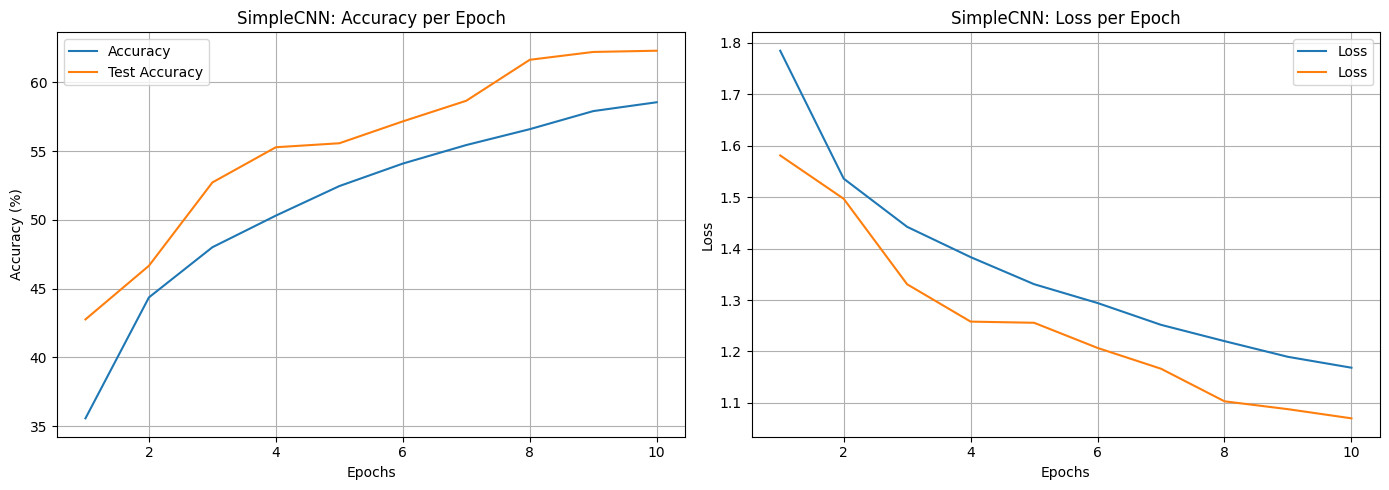

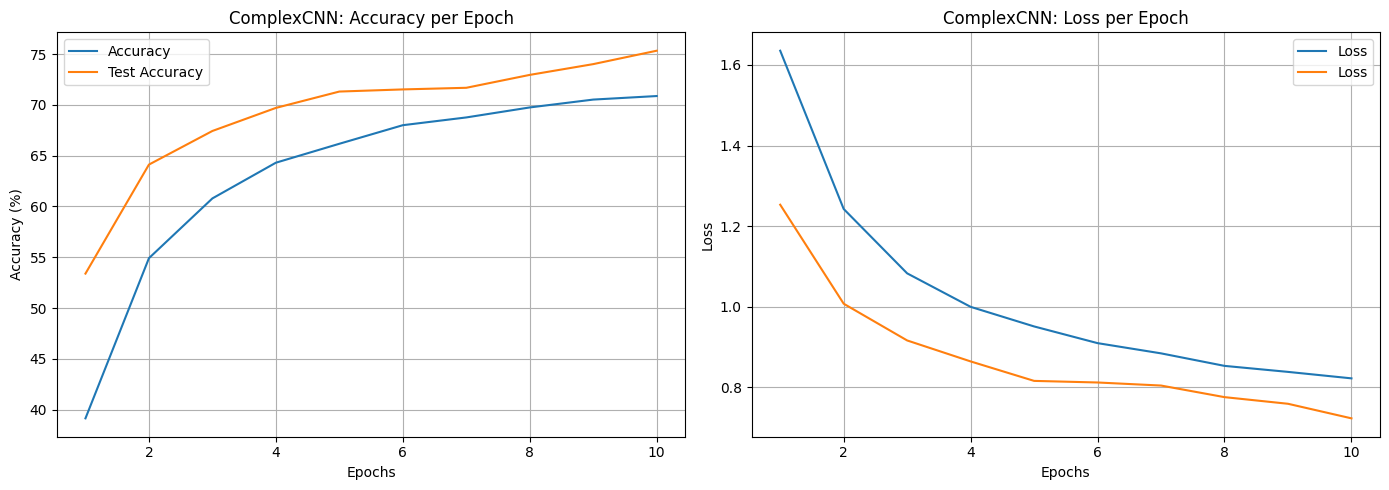

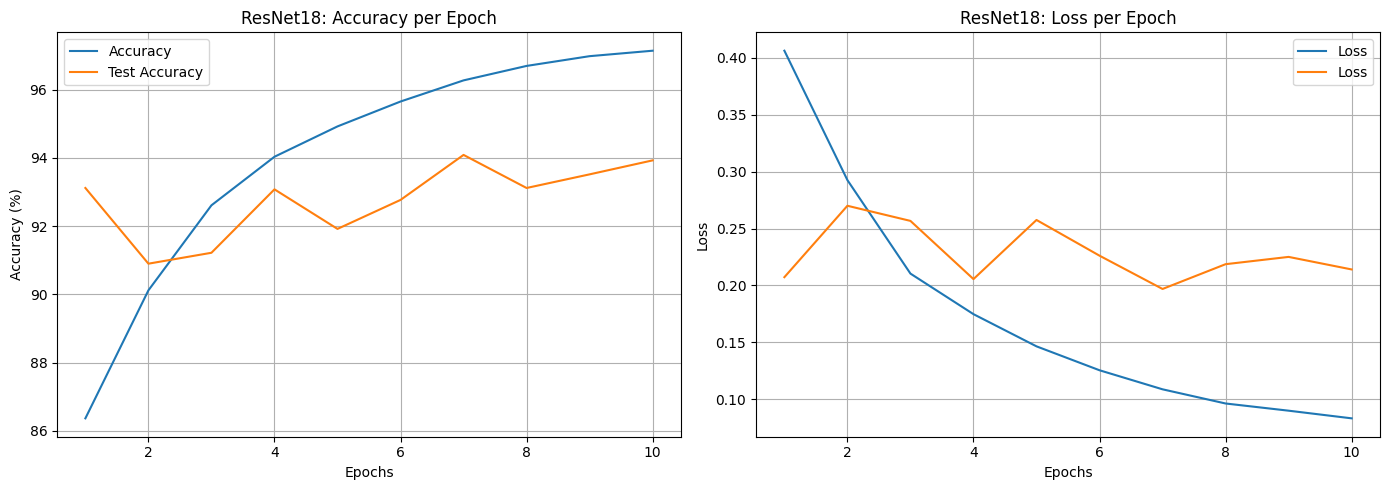

In [42]:
# Plot accuracy and loss curves
import matplotlib.pyplot as plt

model_0_results = {
    "train": model_0_train_results,
    "test": model_0_test_results
}

model_1_results = {
    "train": model_1_train_results,
    "test": model_1_test_results
}

model_2_results = {
    "train": model_2_train_results,
    "test": model_2_test_results
}

# Dictionary of models
models_dict = {
    "SimpleCNN": model_0_results,
    "ComplexCNN": model_1_results,
    "ResNet18": model_2_results
}

for model_name, results in models_dict.items():
    epochs = range(1, len(results["train"]["loss"]) + 1)

    # Plot a figure for each model with two subplots for accuracy and loss
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

    ## Accuracy subplot
    ax1.plot(epochs, results["train"]["accuracy"], label="Accuracy")
    ax1.plot(epochs, results["test"]["accuracy"], label="Test Accuracy")
    ax1.set_title(f"{model_name}: Accuracy per Epoch")
    ax1.set_xlabel("Epochs")
    ax1.set_ylabel("Accuracy (%)")
    ax1.legend()
    ax1.grid(True)

    # Loss subplot
    ax2.plot(epochs, results["train"]["loss"], label="Loss")
    ax2.plot(epochs, results["test"]["loss"], label="Loss")
    ax2.set_title(f"{model_name}: Loss per Epoch")
    ax2.set_xlabel("Epochs")
    ax2.set_ylabel("Loss")
    ax2.legend()
    ax2.grid(True)

    plt.tight_layout()
    plt.show()

# Make and evaluate random predictions wit ResNet

In [31]:
def make_predictions(model: torch.nn.Module,
                     data: list,
                     device: torch.device = device):
    model.eval()
    pred_probs = []

    with torch.inference_mode():
        for sample in data:
            # Prepare the sample
            sample = torch.unsqueeze(sample, dim=0).to(device) # add batch dimension

            # Forward pass
            pred_logits = model(sample)

            # Get prediction probabilities
            pred_prob = F.softmax(pred_logits, dim=1)

            # Get the predicted class
            pred_probs.append(pred_prob.cpu())

    return torch.cat(pred_probs) # concatenate list of tensors into a single tensor


In [32]:
import random
random.seed(42)

test_samples = []
test_labels = []

for sample, label in random.sample(list(resnet_test_data), k=9):
    test_samples.append(sample)
    test_labels.append(label)

print(f"Test sample image shape: {test_samples[0].shape}\nTest sample label: {class_names[test_labels[0]]}")

Test sample image shape: torch.Size([3, 224, 224])
Test sample label: truck


In [33]:
# Make predictions
pred_probs = make_predictions(model=model_2,
                              data=test_samples)

pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([9, 2, 1, 7, 7, 6, 7, 0, 9])

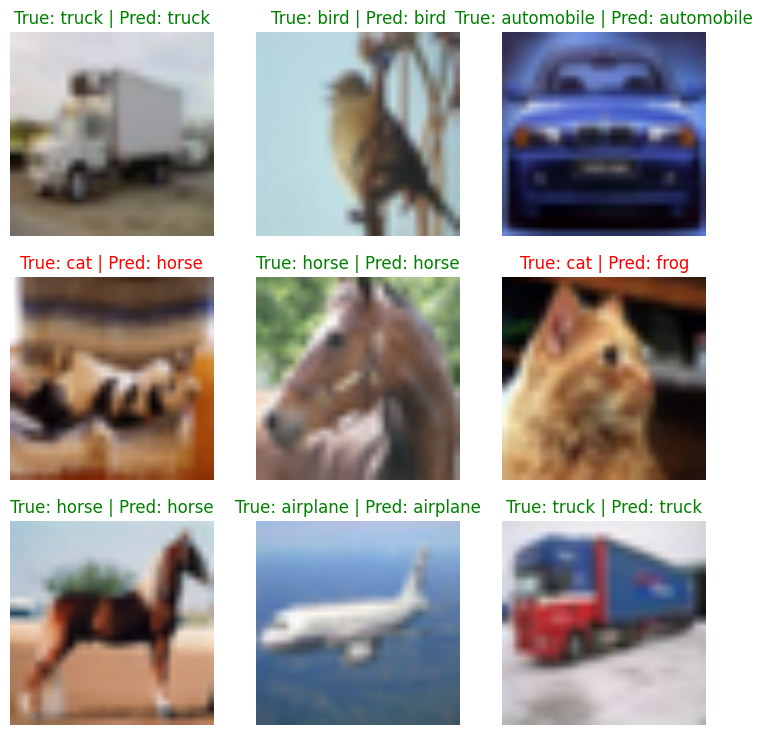

In [34]:
# Plot predictions
plt.figure(figsize=(9,9))
rows, cols = 3, 3

# Mean and std for unnormalization
mean = torch.tensor([0.485, 0.456, 0.406])
std = torch.tensor([0.229, 0.224, 0.225])

for i, sample in enumerate(test_samples):
    # Create subplot
    plt.subplot(rows, cols, i+1)

    # Reverse normalization
    img = sample * std[:, None, None] + mean[:, None, None]
    img = img.permute(1, 2, 0).numpy()  # C,H,W -> H,W,C

    # Plot the images
    plt.imshow(img.clip(0, 1))

    # Find the true and predicted labels
    true_label = class_names[test_labels[i]]
    pred_label = class_names[pred_classes[i]]

    # Create title
    title_text = f"True: {true_label} | Pred: {pred_label}"
    if true_label == pred_label:
        plt.title(title_text, color="green")
    else:
        plt.title(title_text, color="red")
    plt.axis(False)

# Make a confusion Matrix

In [35]:
# Make predictions with resnet model
y_preds = []
model_2.eval()
with torch.inference_mode():
    for X, y in resnet_test_dataloader:
        X = X.to(device)

        # Forward pass
        y_logit = model_2(X)

        # Get prediction probabilities
        y_pred = F.softmax(y_logit, dim=1)

        # Get the predicted class
        y_preds.append(y_pred.argmax(dim=1).cpu())

    # Concatenate list of predictions into a single tensor
    y_pred_tensor = torch.cat(y_preds)

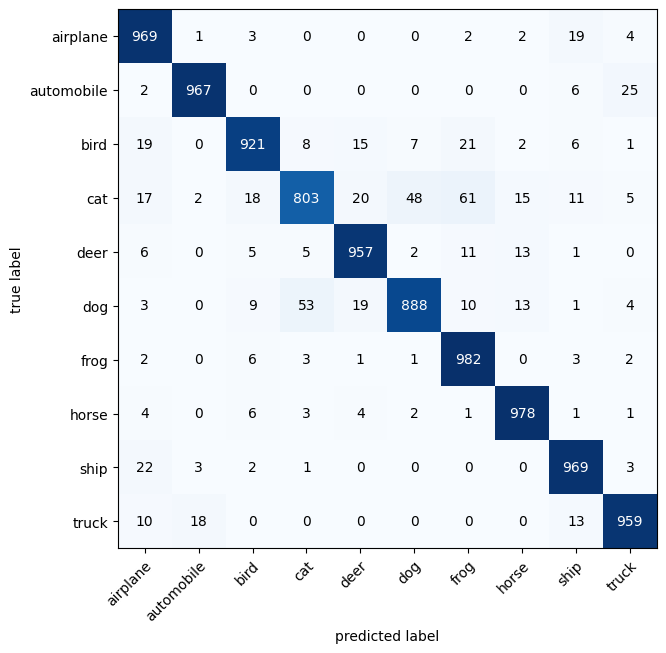

In [36]:
import mlxtend
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# targets = torch.tensor(resnet_test_data.targets)

# Create confusion matrix and compare preditions to ground truth
confmat = ConfusionMatrix(task="multiclass", num_classes=len(class_names))
confmat_tensor = confmat(preds=y_pred_tensor,
                          target=torch.tensor(resnet_test_data.targets))
confusion_matrix = confmat_tensor.numpy()

# Plot confusion matrix
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix,
                                figsize=(10, 7),
                                class_names=class_names)
plt.show()

# Save and load the models

In [37]:
from pathlib import Path

# Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, # create parent directories if they don't exist
                 exist_ok=True) # no error if directory already exists

# Create model save paths
MODEL_0_PATH = MODEL_PATH / "model_0_simple_cnn.pth"
MODEL_1_PATH = MODEL_PATH / "model_1_complex_cnn.pth"
MODEL_2_PATH = MODEL_PATH / "model_2_resnet18.pth"

# Save models state dict
print(f"Saving SimpleCNN to: {MODEL_0_PATH}")
torch.save(obj=model_0.state_dict(), # only saving state_dict only saves model parameters, not the entire model
           f=MODEL_0_PATH)
           
print(f"Saving ComplexCNN to: {MODEL_1_PATH}")
torch.save(obj=model_1.state_dict(),
              f=MODEL_1_PATH)

print(f"Saving ResNet18 to: {MODEL_2_PATH}")
torch.save(obj=model_2.state_dict(),
           f=MODEL_2_PATH)

Saving SimpleCNN to: models\model_0_simple_cnn.pth
Saving ComplexCNN to: models\model_1_complex_cnn.pth
Saving ResNet18 to: models\model_2_resnet18.pth


In [48]:
# Create a new instance of each model
model_0_loaded = SimpleCNN(input_shape=3,
                        hidden_units=32,
                        output_shape=len(class_names))

model_1_loaded = ComplexCNN(input_shape=3,
                        hidden_units=32,
                        output_shape=len(class_names))

model_2_loaded = tv_models.resnet18(pretrained=False) # don't need pretrained weights, we're loading our own
model_2_loaded.fc = nn.Linear(model_2_loaded.fc.in_features, len(class_names))

# Load state dicts
model_0_loaded.load_state_dict(torch.load(MODEL_0_PATH))
model_0_loaded.to(device)

model_1_loaded.load_state_dict(torch.load(MODEL_1_PATH))
model_1_loaded.to(device)

model_2_loaded.load_state_dict(torch.load(MODEL_2_PATH))
model_2_loaded.to(device)

C:\Users\tobyv\AppData\Local\Temp\ipykernel_2464\1934422648.py:14: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_0_loaded.load_state_dict(torch.load(MODEL_0_PATH))
C:\

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  